In [56]:
import pandas as pd
import numpy as np
from losses import rmse_loss, mse_loss
import matplotlib.pyplot as plt

In [57]:
car_dataset = pd.read_csv("../data/Carseats.csv")
car_dataset = pd.get_dummies(car_dataset, columns=["ShelveLoc", "Urban", "US"])
car_dataset

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,False,True,False,False,True,False,True
396,6.14,139,23,3,37,120,55,11,False,False,True,True,False,False,True
397,7.41,162,26,12,368,159,40,18,False,False,True,False,True,False,True
398,5.94,100,79,7,284,95,50,12,True,False,False,False,True,False,True


In [58]:
from sklearn.model_selection import train_test_split
random_state = 42
X = car_dataset.copy()
X = X.drop(columns=["Sales"])
y = car_dataset["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [59]:
y_train_array = np.array(y_train.values)
y_test_array = np.array(y_test.values)
X_train_array = np.array(X_train.values)
X_test_array = np.array(X_test.values)

In [61]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_feature_index = feature_index
                    best_threshold = threshold
            

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)


# X_train = np.array([[1,11], [2,12], [3,13], [4,14], [5,15]])
# y_train = np.array([2, 3, 4, 5, 5])
# X_test = np.array([[2.5], [3.5]])


# tree = CustomDecisionTreeRegressor(max_depth=100000, min_samples_split=1, min_samples=1)
# tree.fit(X_train_array, y_train_array)


# predictions = tree.predict(X_test_array)
# print("Predictions:", predictions)

# results = pd.DataFrame({'Actual': y_test_array, 'Predicted': predictions})
# print(results)

In [63]:
def create_plots(min_samples_split_list, r2_scores, mse_losses, rmse_losses):

    fig, axs = plt.subplots(3, figsize=(10, 15))
    axs[0].plot(min_samples_split_list, r2_scores, marker='o')
    axs[0].set_title('R^2 score')
    axs[0].set_xlabel('min_samples_split')
    axs[0].set_ylabel('R^2 score')
    axs[0].grid(True)
    axs[1].plot(min_samples_split_list, mse_losses, marker='o')
    axs[1].set_title('MSE loss')
    axs[1].set_xlabel('min_samples_split')
    axs[1].set_ylabel('MSE loss')
    axs[1].grid(True)
    axs[2].plot(min_samples_split_list, rmse_losses, marker='o')
    axs[2].set_title('RMSE loss')
    axs[2].set_xlabel('min_samples_split')
    axs[2].set_ylabel('RMSE loss')
    axs[2].grid(True)
    plt.tight_layout()
    plt.show()

In [64]:
max_depth_list = [1, 5, 10, 15, 20, 25,  50, 100]

=======MAX DEPTH = 1======
R^2 score: 0.362783008
MSE loss: 6.306028378047943
RMSE loss: 2.511180674114856
=======MAX DEPTH = 5======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmea

R^2 score: 0.439732796
MSE loss: 5.54451769334578
RMSE loss: 2.3546799556087827
=======MAX DEPTH = 10======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MAX DEPTH = 15======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MAX DEPTH = 20======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MAX DEPTH = 25======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MAX DEPTH = 50======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MAX DEPTH = 100======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014


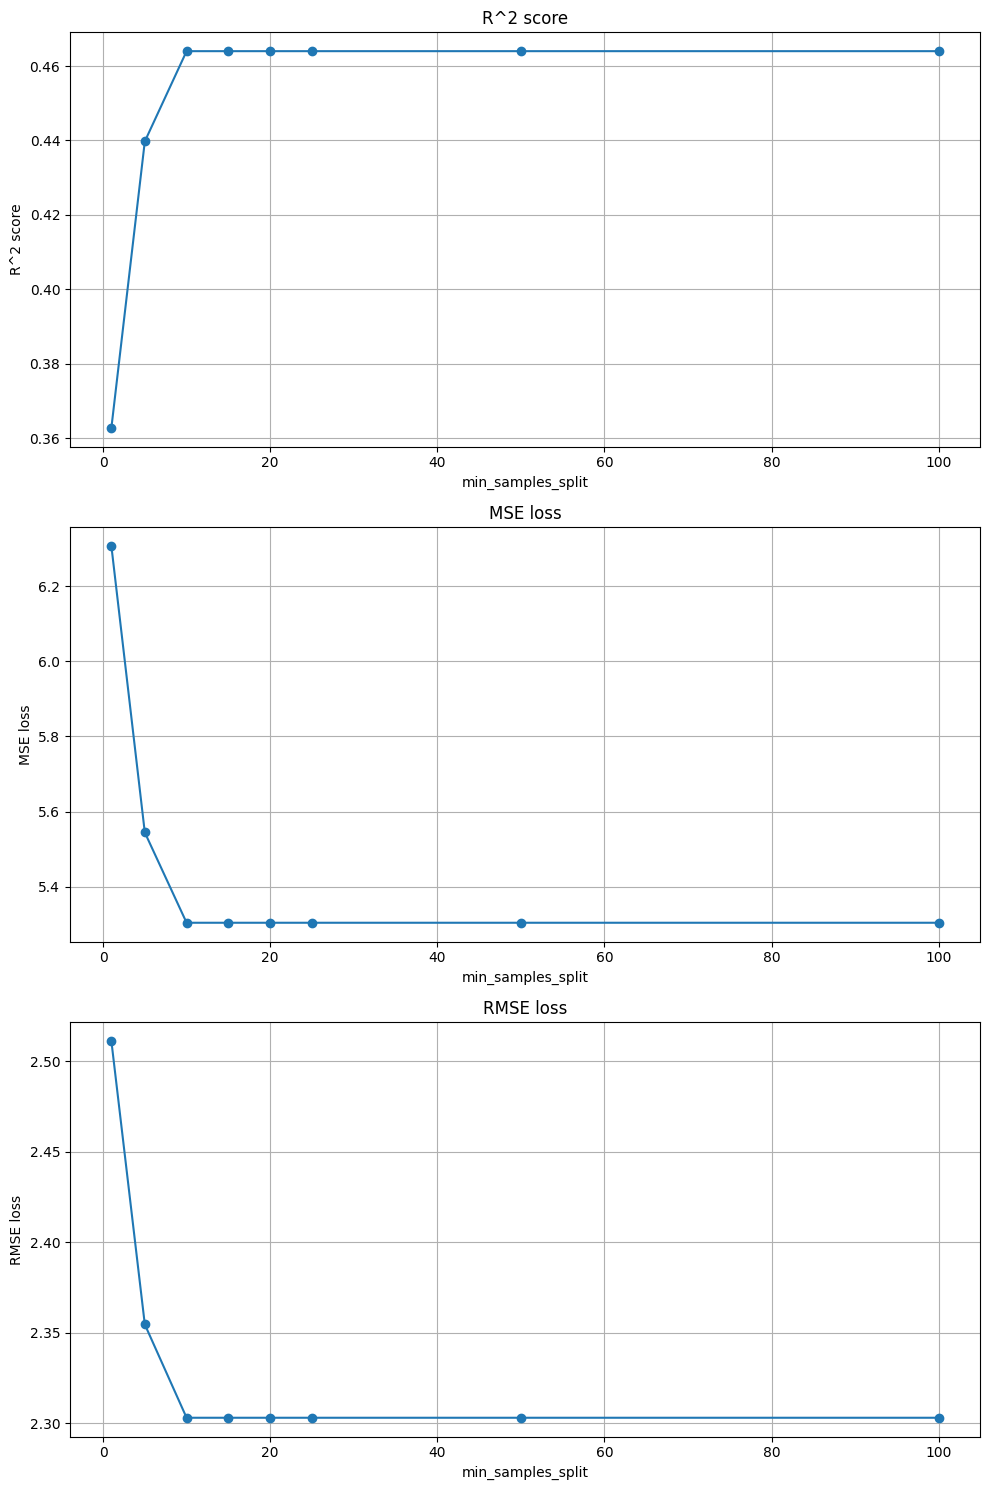

In [65]:
from sklearn.metrics import r2_score

r2_scores = []
mse_losses = []
rmse_losses = []
for max_depth1 in max_depth_list:



    print(f"=======MAX DEPTH = {max_depth1}======")
    tree = CustomDecisionTreeRegressor(max_depth=max_depth1, min_samples_split=10, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_test_array)
    score = r2_score(y_test_array, y_pred)
    mse = mse_loss(y_test_array, y_pred)
    rmse = rmse_loss(y_test_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse}")
    print(f"RMSE loss: {rmse}")
    r2_scores.append(score)
    mse_losses.append(mse)
    rmse_losses.append(rmse)
create_plots(max_depth_list, r2_scores, mse_losses, rmse_losses)

In [66]:
min_samples_split_list = [2, 5, 10, 15, 25, 50, 100]

In [67]:
for min_samples_split in min_samples_split_list:
    print(f"=======MIN SAMPLES  SPLIT= {min_samples_split}======")
    tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=min_samples_split, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_test_array)
    score = r2_score(y_test_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

=======MIN SAMPLES  SPLIT= 2======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MIN SAMPLES  SPLIT= 5======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MIN SAMPLES  SPLIT= 10======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MIN SAMPLES  SPLIT= 15======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.459120101
MSE loss: 5.352657002988407
RMSE loss: 2.313580991231646
=======MIN SAMPLES  SPLIT= 25======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.461149631
MSE loss: 5.332572355894284
RMSE loss: 2.3092363144326056
=======MIN SAMPLES  SPLIT= 50======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.438687554
MSE loss: 5.554861620125221
RMSE loss: 2.3568753934235094
=======MIN SAMPLES  SPLIT= 100======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.399744682
MSE loss: 5.9402481729671655
RMSE loss: 2.4372624341599254


In [68]:
min_samples_leaf_list = [2, 5, 10, 15, 25, 50, 100]

In [70]:
for min_samples_leaf in min_samples_leaf_list:
    print(f"=======MIN SAMPLES  LEAF= {min_samples_leaf}======")
    tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples=min_samples_leaf)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_test_array)
    score = r2_score(y_test_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

=======MIN SAMPLES  LEAF= 2======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.515196342
MSE loss: 4.79771516713829
RMSE loss: 2.1903687285793434
=======MIN SAMPLES  LEAF= 5======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.463991192
MSE loss: 5.304451693953137
RMSE loss: 2.303139529849014
=======MIN SAMPLES  LEAF= 10======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.526424240
MSE loss: 4.686601613293578
RMSE loss: 2.1648560259965506
=======MIN SAMPLES  LEAF= 15======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.502732291
MSE loss: 4.921061933651222
RMSE loss: 2.2183466666982468
=======MIN SAMPLES  LEAF= 25======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.438267002
MSE loss: 5.559023487714318
RMSE loss: 2.357758148690047
=======MIN SAMPLES  LEAF= 50======
R^2 score: 0.357700256
MSE loss: 6.356328320003934
RMSE loss: 2.5211759795785644
=======MIN SAMPLES  LEAF= 100======


c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmea

R^2 score: 0.464470996
MSE loss: 5.299703464237355
RMSE loss: 2.302108482291257


In [77]:
sumded = 0
for test, prd in zip(y_test_array,predictions):
  sumded += abs(test-prd)
print(sumded)

9931054.300000023


In [78]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_array, predictions)

print(f"R^2 score: {r2}")

R^2 score: 0.9999948182321369


In [88]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))
            thresholds_reductions = []
            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if np.isfinite(variance_reduction):
                    thresholds_reductions.append((threshold, variance_reduction))
            
            if thresholds_reductions:
                _, weights = zip(*thresholds_reductions)
                random.seed(42)
                threshold, variance_reductions = zip(*random.choices(thresholds_reductions, weights=weights, k=1))
                variance_reduction = variance_reductions[0]
            if variance_reduction > best_variance_reduction:
                best_variance_reduction = variance_reduction
                best_feature_index = feature_index
                best_threshold = threshold
        

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        temp = x[node.feature_index]
        if temp == False:
            temp = 0
        if temp <= node.threshold[0]:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)



tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples=5)
tree.fit(X_train_array, y_train_array)
y_pred = tree.predict(X_test_array)

c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [93]:
tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples=5)
tree.fit(X_train_array, y_train_array)
y_pred = tree.predict(X_test_array)
print(y_pred)
score = r2_score(y_test_array, y_pred)
print(f"R^2 score: {score:.9f}")
print(f"MSE loss: {mse_loss(y_test, y_pred)}")
print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\Desktop\RegressionTreeRoulette\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[ 4.908       4.30142857  8.818       4.40142857  9.31142857  4.40142857
 11.09142857  5.92555556 11.91166667 11.61625     6.45333333  8.98428571
  8.50571429  5.09142857  6.31285714  8.50571429  7.94375    11.91166667
  7.681875    6.68333333 10.2075      3.20833333  5.66166667  5.09833333
  8.81666667  7.681875    7.33833333  5.92555556  5.99571429  4.66
 11.61625    11.91166667  6.32272727  3.8875     11.91166667  6.45333333
  8.81666667  7.681875   11.91166667  5.56142857  4.30142857  4.444
 10.2075     11.09142857  7.94375     8.66833333  6.35857143  6.35857143
  4.66        7.681875   10.2075      7.33833333  6.38857143 11.91166667
  7.681875    3.06555556  5.09833333 11.91166667 11.09142857 11.61625
  8.282      11.91166667  4.908       5.99571429  7.681875    5.99571429
 10.44571429  7.33833333  4.30142857 11.91166667  5.99571429  6.68333333
  4.908       3.06555556  4.908       4.908       5.09142857 10.13
  6.68333333  6.68333333]
R^2 score: 0.566862922
MSE loss: 4.2864122242

In [77]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))
            thresholds_reductions = []

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if np.isfinite(variance_reduction):
                    thresholds_reductions.append((threshold, variance_reduction))
            
            if thresholds_reductions:
                _, weights = zip(*thresholds_reductions)
                threshold, variance_reductions = zip(*random.choices(thresholds_reductions, weights=weights, k=1))
                variance_reduction = variance_reductions[0]

            if variance_reduction > best_variance_reduction:
                best_variance_reduction = variance_reduction
                best_feature_index = feature_index
                best_threshold = threshold

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)



tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples=5)
tree.fit(X_train_array, y_train_array)
y_pred = tree.predict(X_test_array)

TypeError: '<=' not supported between instances of 'bool' and 'tuple'

In [74]:

import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))
            thresholds_reductions = []

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if np.isfinite(variance_reduction):
                    thresholds_reductions.append((threshold, variance_reduction))
            
            if thresholds_reductions:
                _, weights = zip(*thresholds_reductions)
                threshold, variance_reductions = zip(*random.choices(thresholds_reductions, weights=weights, k=1))
                variance_reduction = variance_reductions[0]

            if variance_reduction > best_variance_reduction:
                best_variance_reduction = variance_reduction
                best_feature_index = feature_index
                best_threshold = threshold

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)




